# **Latar Belakang**
Transjakarta adalah sebuah sistem transportasi Bus Rapid Transit (BRT) yang beroperasi di Jakarta, Indonesia. TransJakarta dirancang sebagai moda transportasi massal pendukung aktivitas ibukota yang sangat padat. Dengan jalur lintasan terpanjang di dunia (251.2 km), serta memiliki 260 halte yang tersebar dalam 13 koridor, Transjakarta beroperasi 24 jam. 


## **Pernyataan Masalah**
Perusahaan Transjakarta ingin mengetahui **kepadatan jumlah penumpan pada setiap jenis dan kode trayek**. Informasi ini akan membantu perusahaan untuk mengurangi ongkos dan armada, meningkatkan kualitas, fasilitas dan membantu aktivitas ibukota yang sangat padat. 

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana kepadatan jumlah penumpang transjakarta, terutama dibandingkan pada setiap jenis dan kode trayek?**

# **Data**
Untuk menjawab pertanyaan di atas, kita akan menganalisa data penumpang transjakarta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1L2BIjpuegENmJfiu4lZ4CcjJhZdFo_8x). 

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

# pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait waktu, jenis angkutan, trayek beserta kodenya dan jumlah penumpang. Ada 6 kolom di dalam dataset Transjakarta Passengers, yaitu:  

- tahun: waktu pelaksanaan pengambilan data.
- bulan: bulan pengambilan data.
- jenis: jenis angkutan.
- kode_trayek: kode trayek.
- trayek: trayek (rute).
- jumlah_penumpang: jumlah penumpang.


Berikut 5 baris teratas dan terbawah dari dataset Transjakarta Passengers.

In [133]:
df=pd.read_csv('TransJakarta Passengers 2021.csv')
display(df.head(),df.tail())

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3


## **Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Transjakarta Passengers 2021.

In [134]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (1473, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [135]:
display(df.describe(), df.describe(include='object'))

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


In [136]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,tahun,1,[2021]
1,bulan,12,"[10, 8, 3, 6, 1, 5, 12, 9, 2, 7, 4, 11]"
2,jenis,3,"[Mikrotrans, BRT, Angkutan Umum Integrasi]"
3,kode_trayek,135,"[JAK.88, JAK.85, JAK.84, JAK.80, JA.77, JAK.75, JAK.74, JAK.73, JAK.72, JAK.71, JAK.64, JAK.61, JAK.60, JAK.59, JAK.58, JAK.56, JAK.54, JAK.53, JAK.52, JAK.51, JAK.50, JAK.49, JAK.47, JAK.46, JAK.45, JAK.44, JAK.43, JAK.42, JAK.41, JAK.40, JAK.39, JAK.38, JAK.37, JAK.36, JAK.35, JAK.34, JAK.33, JAK.32, JAK.31, JAK.30, JAK.29, JAK.28, JAK.27, JAK.26, JAK.25, JAK.24, JAK.22, JAK.21, JAK.20, JAK,19, JAK.18, JAK.17, JAK.16, JAK.15, JAK.14, JAK.13, JAK.12, JAK.117, JAK.112, JAK.11, JAK.10, JAK.09, JAK.08, JAK.07, JAK.06, JAK.05, JAK.04, JAK.03, JAK.02, JAK.01, 9, 8, 7, 6, 5, 4, 3, 2, 13, 12, 11, 10, 1, 9H, 9E, 9D, 8K, 8E, 8D, 8C, 7P, 7D, 7B, 7A, 6R, 6N, 6M, 6H, 6C, 5M, ...]"
4,trayek,136,"[Terminal Tanjung Priok - Ancol Barat, Bintara - Cipinang Indah, Terminal Kampung Melayu - Kapin Raya, Rawa Buaya - Rawa Kompeni, Tanjung Priok - Jembatan Item, Cililitan - Kp. Pulo, Terminal Rawamangun - Cipinang Muara, Jambore Cibubur - Pasar Rebo, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Lenteng Agung - Aseli, Cempaka Putih - Pulo Gadung via Kelapa Gading, Kelapa Gading - Rusun Kemayoran, Rawamangun - Tanah Merah, Cilingcing - Rorotan, Grogol - Srengseng, Grogol - Benhil, Grogol - Pos Pengumben via Slipi, Kalideres - Muara Angke, Taman Kota - Budi Luhur, Kalideres - Puri Kembangan, Lebak Bulus - Cipulir, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Lebak Bulus - Ragunan, Andara - Stasiun Universitas Pancasila, Tongtek - Cililitan, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Harapan Baru - Pulo Gebang via Rawa Kuning, Kalimalang - Duren Sawit, Bulak Ringin - Kampung Rambutan, Cililitan - Condet via Kayu Manis, Cilangkap - Cililitan, Pangkalan Jati - Rawamangun, Rawamangun - Klender, Pulo Gadung - Kota, Lebak Bulus - Petukangan, Blok M - Andara, Grogol - Meruya via Roxy, Tanjung Priok - Sukapura, Kp. Rambutan - Taman Wiladatika, Pulo Gebang - Rorotan, Rawamangun - Duren Sawit, Kp. Rambutan - Kalisari, Senen - Pulo Gadung via Kelapa Gading, Dwikora - Penas Kalimalang, Cililitan - Dwikora, Cawang UKI - Lubang Buaya, Pinang Ranti - Kampung Rambutan, Kalibata - Kuningan, Senen - Pulo Gadung , Bulak Turi - Tanjung Priok, Tanah Abang - Meruya, Tanah Abang - Kota Intan via Jembatan Lima, Tanah Abang - Kebayoran Lama via Pos Pengumben, Tanjung Priok - Tanah Merdeka, Terminal Tanah Merah - Pulo Gadung, Tanah Abang - Kebayoran Lama , Tanah Abang - Kota , Roxy Mas - Karet, Roxy - Benhil, Tanah Abang - Grogol via Tawakal, Kampung Rambutan - Pondok Gede, Semper - Rorotan, Grogol - Tubagus Angke, Lebak Bulus - Andara, Kampung Melayu - Duren Sawit, Tanjung Priok - Plumpang, Pinang Ranti - Pluit, Lebak Bulus - Harmoni, Kampung Rambutan - Kampung Melayu, Ragunan - Dukuh Atas 2, Kampung Melayu - Ancol, Pulo Gadung 2 - Tosari, Kalideres - Pasar Baru, Pulo Gadung 1 - Harmoni, Ciledug - Tendean, Penjaringan - Sunter Bouleverd Barat, Pulo Gebang - Kampung Melayu, Tanjung Priok - PGC 2, Blok M - Kota, Cipedak - Blok M, Kebayoran Lama - Jelambar, Pasar Minggu - Tanah Abang, Batu Sari-Tanah Abang, Bintaro - Blok M, Joglo - Blok M, Kebayoran Lama - Tanah Abang, Pondok Kelapa - BKN, Pancoran - TMII, Kampung Rambutan - Blok M, Kampung Rambutan - Lebak Bulus, Ragunan - Stasin MRT Fatmawati, Ragunan - Blok M via Kemang, Stasiun Manggarai - Blok M, Senen - Lebak Bulus, Stasin Tebet - Karet via Patra Kuningan, Kampung Melayu - Tanah Abang via Cikini, Kampung Melayu - Tanah Abang, ...]"
5,jumlah_penumpang,1420,"[31197, 30711, 40186, 61883, 66616, 50363, 50676, 75846, 97831, 57649, 52926, 35233, 69665, 72106, 91654, 49293, 41815, 46344, 65266, 104140, 69097, 44014, 50597, 83425, 48167, 64885, 94923, 71096, 46177, 41534, 63975, 46304, 59214, 64162, 32715, 69978, 51615, 79962, 60715, 133054, 117647, 62587, 51771, 43232, 4947

Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta Passengers 2021 memiliki 6 kolom dan 1.473 baris
* kolom `trayek` memiliki data kosong. Data kosong pada kolom tersebut diwakili dengan data NaN.
* kolom `tahun` berisikan tahun pengambilan data tersebut, karena seluruh data diambil pada tahun 2021, kolom tersebut hanya memiliki satu nilai dan tidak relevan dalam analisis sehingga bisa dihapus saja.
* ada kesalahan ketik di kolom `Kode_trayek` dan `trayek`. 

### **Missing Value**

#### trayek

In [137]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              2
jumlah_penumpang    0
dtype: int64

*Setelah melihat data pada kolom `trayek`, terdapat 2 NaN di dalam kolom tersebut. Data tersebut dapat kita isi dengan melihat `kode_trayek` yang ada. Setelah itu untuk dapat mempermudah melihat trayek akan dilakukan pemisahan kolom pada 2 tujuan trayek yang ada.*

In [138]:
# Menampilkan baris yang meiliki nilai NaN
df[df['trayek'].isna()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992


In [139]:
df[(df['kode_trayek'] == 'JAK.10A') |(df['kode_trayek'] == 'JAK.10B')]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
304,2021,3,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828
305,2021,3,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,16781
795,2021,12,Mikrotrans,JAK.10B,NaN,4085
796,2021,12,Mikrotrans,JAK.10A,NaN,33992
1159,2021,7,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,19060
1404,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008
1405,2021,11,Mikrotrans,JAK.10A,Gondangdia - Cikini via Salemba Raya,30703


In [140]:
# mengisi nilai NaN pada trayek dengan kode_trayek yang sesuai baris lainnya
df[df['kode_trayek'] == 'JAK.10A'] = df[df['kode_trayek'] == 'JAK.10A'].fillna('Gondangdia-Cikini via Salemba Raya')

In [141]:
# mengisi nilai NaN pada trayek dengan kode_trayek yang sesuai baris lainnya
df[df['kode_trayek'] == 'JAK.10B'] = df[df['kode_trayek'] == 'JAK.10B'].fillna('Gondangdia-Cikini via Kramat Raya')

In [142]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

*untuk memudahkan dalam memperbaiki penulisan dalam kolom `trayek`, maka dilakukan pemisahan 2 titik yang ada pada kolom `trayek`*

In [143]:
df[['titik_1', 'titik_2']] = df['trayek'].str.split('-', expand=True)

Menghapus whitespace pada setiap baris di kolom dengan type object

In [144]:
df['jenis'] = df['jenis'].str.strip()
df['kode_trayek'] = df['kode_trayek'].str.strip()
df['trayek'] = df['trayek'].str.strip()
df['titik_1'] = df['titik_1'].str.strip()
df['titik_2'] = df['titik_2'].str.strip()

#### titik_2

In [145]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
titik_1             0
titik_2             9
dtype: int64

In [146]:
# Menampilkan baris yang meiliki nilai NaN
df[df['titik_2'].isna()]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,titik_1,titik_2
121,2021,10,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,21,Kota Tua Explorer,None
243,2021,8,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,8,Kota Tua Explorer,None
489,2021,6,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,33,Kota Tua Explorer,None
573,2021,1,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,261,Kota Tua Explorer,None
731,2021,5,Angkutan Umum Integrasi,GR2,Tanah Abang Explorer,3945,Tanah Abang Explorer,None
734,2021,5,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,24,Kota Tua Explorer,None
978,2021,9,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,15,Kota Tua Explorer,None
1223,2021,7,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,11,Kota Tua Explorer,None
1472,2021,11,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,3,Kota Tua Explorer,None


*Setelah melihat data pada kolom `titik_2`, terdapat 9 NaN di dalam kolom tersebut. Data tersebut dapat kita isi dengan melihat kolom `titik_1` yang ada. Karena untuk `titik_2` pada kolom tersebut diisi dengan titik yang sama pada `titik_1`.*

In [147]:
# mengisi nilai NaN pada titik_2 dengan titik_1 yang sesuai barisnya
df[df['kode_trayek'] == 'GR5'] = df[df['kode_trayek'] == 'GR5'].fillna('Kota Tua Explorer')

In [148]:
# mengisi nilai NaN pada titik_2 dengan titik_1 yang sesuai barisnya
df[df['kode_trayek'] == 'GR2'] = df[df['kode_trayek'] == 'GR2'].fillna('Tanah Abang Explorer')

In [149]:
df.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
titik_1             0
titik_2             0
dtype: int64

### **Error Typography**

Memperbaiki kesalahan penulisan dan menyeragamkan penulisan pada DataFrame 

In [150]:
replacements = {'JA.77': 'JAK.77', 
                'JAK,19': 'JAK.19', 
                'JAK. 10B': 'JAK.10B', 
                'Pulo Ggadung': 'Pulo Gadung',
                'Pulo Ggadung 2': 'Pulo Gadung 2',
                'Ppulo Gadung': 'Pulo Gadung',
                'Stasin Tebet': 'Stasiun Tebet',
                'Stasin MRT Fatmawati': 'Stasiun MRT Fatmawati', 
                'Pangkalan  Jati': 'Pangkalan Jati',
                'Blok  M': 'Blok M',
                'Kp. Pulo': 'Kampung Pulo',
                'Kp. Rambutan': 'Kampung Rambutan'}
df = df.replace(replacements)

Menyeragamkan kolom 'titik_2' pada df[df['kode_trayek'] == 'JAK.10B']

In [151]:
df[df['kode_trayek'] == 'JAK.10B']

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,titik_1,titik_2
304,2021,3,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,2828,Gondangdia,Cikini via Kramat Raya
795,2021,12,Mikrotrans,JAK.10B,Gondangdia-Cikini via Kramat Raya,4085,Gondangdia,Cikini via Kramat Raya
1158,2021,7,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Jaya,3136,Gondangdia,Cikini via Kramat Jaya
1404,2021,11,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Raya,4008,Gondangdia,Cikini via Kramat Raya


In [152]:
df[(df['bulan'] == 7) & (df['kode_trayek'] == 'JAK.10B')] = df[(df['bulan'] == 7) & (df['kode_trayek'] == 'JAK.10B')].replace('Cikini via Kramat Jaya','Cikini via Kramat Raya')
df[(df['bulan'] == 7) & (df['kode_trayek'] == 'JAK.10B')]


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,titik_1,titik_2
1158,2021,7,Mikrotrans,JAK.10B,Gondangdia - Cikini via Kramat Jaya,3136,Gondangdia,Cikini via Kramat Raya


meyeragamkan kolom 'titik 1' pada 'kode_trayek' 1A yang merupakan Pantai Maju

In [153]:
df[df['kode_trayek'] == '1A']

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,titik_1,titik_2
115,2021,10,Angkutan Umum Integrasi,1A,PIK - Balai Kota,67571,PIK,Balai Kota
237,2021,8,Angkutan Umum Integrasi,1A,PIK - Balai Kota,35608,PIK,Balai Kota
363,2021,3,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592,Pantai Maju,Balai Kota
483,2021,6,Angkutan Umum Integrasi,1A,PIK - Balai Kota,66928,PIK,Balai Kota
605,2021,1,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721,Pantai Maju,Balai Kota
726,2021,5,Angkutan Umum Integrasi,1A,PIK - Balai Kota,62524,PIK,Balai Kota
852,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0,PIK,Balai Kota
972,2021,9,Angkutan Umum Integrasi,1A,PIK - Balai Kota,54065,PIK,Balai Kota
1093,2021,2,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669,Pantai Maju,Balai Kota
1217,2021,7,Angkutan Umum Integrasi,1A,PIK - Balai Kota,29960,PIK,Balai Kota


In [154]:
df[df['kode_trayek'] == '1A'] = df[df['kode_trayek'] == '1A'].replace('PIK', 'Pantai Maju')
df[df['kode_trayek'] == '1A']

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,titik_1,titik_2
115,2021,10,Angkutan Umum Integrasi,1A,PIK - Balai Kota,67571,Pantai Maju,Balai Kota
237,2021,8,Angkutan Umum Integrasi,1A,PIK - Balai Kota,35608,Pantai Maju,Balai Kota
363,2021,3,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,68592,Pantai Maju,Balai Kota
483,2021,6,Angkutan Umum Integrasi,1A,PIK - Balai Kota,66928,Pantai Maju,Balai Kota
605,2021,1,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,62721,Pantai Maju,Balai Kota
726,2021,5,Angkutan Umum Integrasi,1A,PIK - Balai Kota,62524,Pantai Maju,Balai Kota
852,2021,12,Angkutan Umum Integrasi,1A,PIK - Balai Kota,0,Pantai Maju,Balai Kota
972,2021,9,Angkutan Umum Integrasi,1A,PIK - Balai Kota,54065,Pantai Maju,Balai Kota
1093,2021,2,Angkutan Umum Integrasi,1A,Pantai Maju - Balai Kota,50669,Pantai Maju,Balai Kota
1217,2021,7,Angkutan Umum Integrasi,1A,PIK - Balai Kota,29960,Pantai Maju,Balai Kota


### **Duplicates**


In [155]:
# melakukan pengecekan apakah terdapat data yang masih duplikat
df.duplicated(subset=['bulan','jenis','kode_trayek','trayek']).sum()

1

In [156]:
# menampilkan row yang duplikat
df[df.duplicated(subset=['bulan','jenis','kode_trayek','trayek'])]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang,titik_1,titik_2
1452,2021,11,Angkutan Umum Integrasi,3E,Sentraland Cengkareng - Puri Kembangan,27894,Sentraland Cengkareng,Puri Kembangan


In [157]:
# menghapus data duplikat dan menyisakan data yang terakhir karena dianggap sebagai update terakhir data
df = df.drop_duplicates(subset=['bulan','kode_trayek','trayek'],keep='last')

In [158]:
df.duplicated(subset=['bulan','jenis','kode_trayek','trayek']).sum()

0

### **Drop Columns**

#### tahun dan trayek
kolom `tahun` berisikan tahun pengambilan data, dengan nilai data yang sama sehingga tidak relevan dalam analisis dan bisa dihapus saja.

kolom `trayek` juga dihapus, karena sudah dilakukan pemisahan kolom untuk mempermudah analisis

In [159]:
df.drop(columns=['tahun','trayek'],inplace=True)

In [160]:
df = df[['bulan', 'jenis', 'kode_trayek', 'titik_1', 'titik_2', 'jumlah_penumpang']]
df

,bulan,jenis,kode_trayek,titik_1,titik_2,jumlah_penumpang
0,10,Mikrotrans,JAK.88,Terminal Tanjung Priok,Ancol Barat,31197
1,10,Mikrotrans,JAK.85,Bintara,Cipinang Indah,30711
2,10,Mikrotrans,JAK.84,Terminal Kampung Melayu,Kapin Raya,40186
3,10,Mikrotrans,JAK.80,Rawa Buaya,Rawa Kompeni,61883
4,10,Mikrotrans,JAK.77,Tanjung Priok,Jembatan Item,66616
...,...,...,...,...,...,...
1468,11,Angkutan Umum Integrasi,11Q,Kampung Melayu,Pulo Gebang via BKT,11353
1469,11,Angkutan Umum Integrasi,11D,Pulo Gebang,Pulo Gadung 2 via PIK,59155
1470,11,Angkutan Umum Integrasi,10K,Tanjung Priok,Senen via Taman BMW,34498
1471,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan,Museum Bahari,4


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [161]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(1472, 6)


,dataFeatures,dataType,null,unique,uniqueSample
0,bulan,int64,0,12,"[2, 10]"
1,jenis,object,0,3,"[Angkutan Umum Integrasi, Mikrotrans]"
2,kode_trayek,object,0,131,"[7A, JAK.04]"
3,titik_1,object,0,71,"[Blok M, Ragunan]"
4,titik_2,object,0,94,"[Tendean, Dukuh Atas 2]"
5,jumlah_penumpang,int64,0,1419,"[115672, 41360]"


Sebelum dibersihkan, kita memiliki 1,743 baris data, sekarang kita masih memiliki 1,743 baris. Walaupun terdapat beberapa missing value, tetapi dapat diatasi dengan melihat nilai dari kolom lain. Sehingga data dapat dianggap relevan dan tidak diperlukan penghapusan terhadap baris tersebut.

In [162]:
df.to_csv('TJ.csv', index=False)

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **seberapa padat jumlah penumpang pada setiap jenis dan kode trayek transjakarta**.  

Analisis akan dilakukan dengan membandingkan data jumlah penumpang pada setiap bulannya berdasarkan fitur yang tersedia.

''

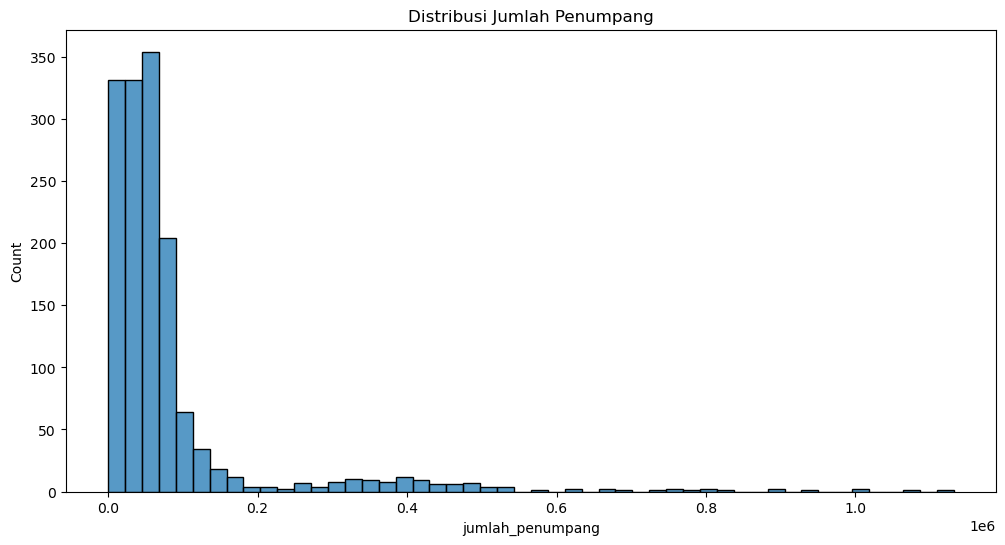

In [163]:
plt.figure(figsize=(12,6))

sns.histplot(data=df, x=df['jumlah_penumpang'], bins=50)

plt.title('Distribusi Jumlah Penumpang')
;

In [164]:
df[['jumlah_penumpang']].describe()

,jumlah_penumpang
count,1.472000e+03
mean,8.173074e+04
std,1.265585e+05
min,0.000000e+00
25%,2.504075e+04
50%,4.963350e+04
75%,7.514300e+04
max,1.131439e+06


## Berdasarkan jenis: `jenis` 

Pertama, mari kita lihat bagaimana pengaruh jenis armada dengan jumlah penumpang. Kita akan menganalisis kolom  `jenis` untuk menjawab beberapa pertanyaan.

* Jenis mana yang memiliki paling banyak jumlah penumpang?
* Pada setiap Jenis bagaimana jumlah penumpang pada setiap bulannya?
* Dari Jenis mana jumlah penumpang paling banyak? Apakah secara proporsi jenis tersebut juga memiliki jumlah penumpang paling tinggi setiap bulannya?

In [165]:
# jumlah penumpang pada setiap bulannya berdasarkan jenis
df_jenis = df.groupby(['jenis','bulan']).sum()
df_jenis

jumlah_penumpang
jenis                   bulan                  
Angkutan Umum Integrasi 1      1144418         
                        2      889506          
                        3      1163835         
                        4      1168871         
                        5      1043163         
                        6      1099961         
                        7      573188          
                        8      725174          
                        9      990462          
                        10     1128449         
                        11     1353278         
                        12     184             
BRT                     1      4828190         
                        2      4793696         
                        3      5948741         
                        4      5909231         
                        5      5455493         
                        6      5419422         
                        7      2272391         
                        8      2866177         
                        9      4368891         
                        10     5196358         
                        11     5999289         
                        12     6053477         
Mikrotrans              1      3824758         
                        2      3698297         
                        3      4482432         
                        4      4546512         
                        5      4324680         
                        6      4527272         
                        7      3737526         
                        8      2906877         
                        9      3172154         
                        10     4341452         
                        11     5064976         
                        12     5288865

Karena pada jenis angkutan umum integrasi terdapat data yang belum lengkap pada bulan 12, maka untuk keperluan analisis seluruh data bulan 12 di setiap jenis akan dihapuskan.

In [166]:
df_jenis = df_jenis.drop([('Angkutan Umum Integrasi', 12),('BRT', 12),('Mikrotrans', 12)])
df_jenis

jumlah_penumpang
jenis                   bulan                  
Angkutan Umum Integrasi 1      1144418         
                        2      889506          
                        3      1163835         
                        4      1168871         
                        5      1043163         
                        6      1099961         
                        7      573188          
                        8      725174          
                        9      990462          
                        10     1128449         
                        11     1353278         
BRT                     1      4828190         
                        2      4793696         
                        3      5948741         
                        4      5909231         
                        5      5455493         
                        6      5419422         
                        7      2272391         
                        8      2866177         
                        9      4368891         
                        10     5196358         
                        11     5999289         
Mikrotrans              1      3824758         
                        2      3698297         
                        3      4482432         
                        4      4546512         
                        5      4324680         
                        6      4527272         
                        7      3737526         
                        8      2906877         
                        9      3172154         
                        10     4341452         
                        11     5064976

*Pada jumlah penumpang dibawah ini merupakan data dari jumlah penumpang setiap bulannya*

In [167]:
penumpang_jenis = df_jenis.groupby('jenis')[['jumlah_penumpang']].sum()
penumpang_jenis_1 = penumpang_jenis.reset_index()
penumpang_jenis_1

,jenis,jumlah_penumpang
0,Angkutan Umum Integrasi,11280305
1,BRT,53057879
2,Mikrotrans,44626936


''

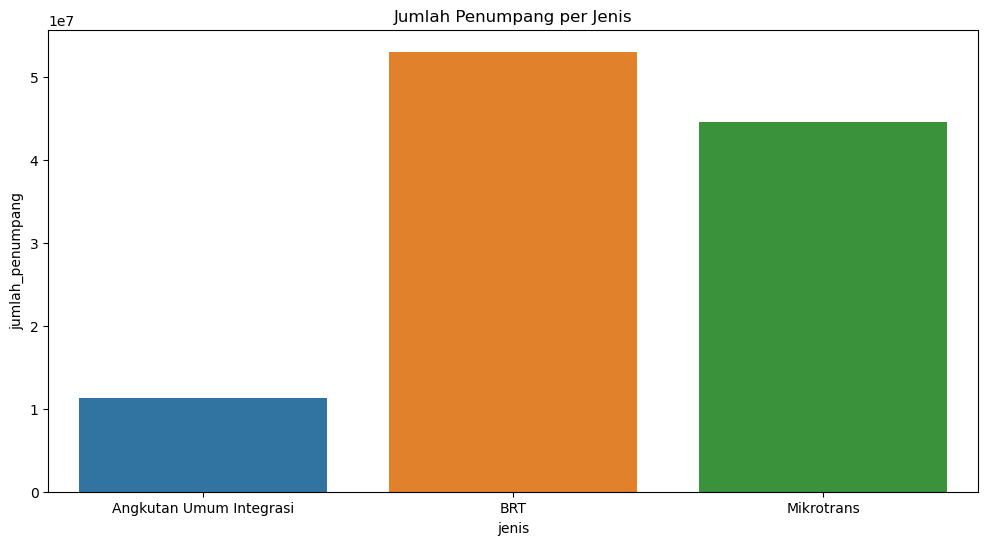

In [168]:
# jenis vs jumlah_penumpang
plt.figure(figsize=(12,6))

sns.barplot(
    data=penumpang_jenis_1,
    x='jenis',
    y='jumlah_penumpang',
    ci=0,
    estimator = np.sum
)
plt.title('Jumlah Penumpang per Jenis')
;

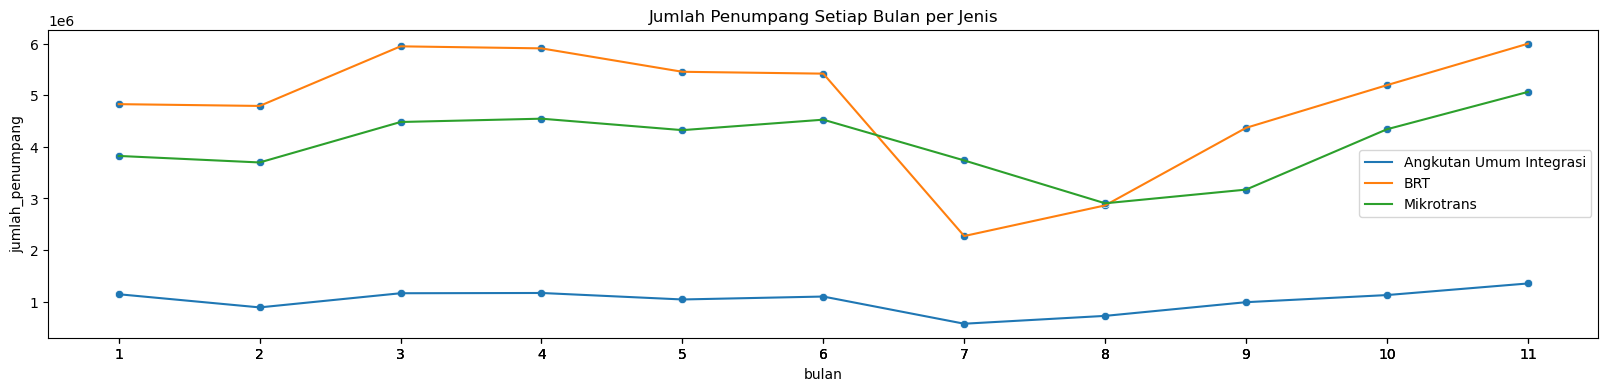

In [169]:
plt.figure(figsize=(20,4))

df_jenis = df_jenis.reset_index()

sns.lineplot(
    data=df_jenis,
    x= 'bulan',           
    y= 'jumlah_penumpang',
    hue= 'jenis',
    ci=0         
)

sns.scatterplot(
    data=df_jenis,
    x= 'bulan',           
    y= 'jumlah_penumpang',
    ci=0           
)

plt.xticks(ticks=df_jenis['bulan'])
plt.title('Jumlah Penumpang Setiap Bulan per Jenis')
plt.legend()
plt.show()

In [170]:
df_jenis_bulan = df_jenis.groupby(['bulan','jenis']).sum()
df_jenis_bulan

jumlah_penumpang
bulan jenis                                    
1     Angkutan Umum Integrasi  1144418         
      BRT                      4828190         
      Mikrotrans               3824758         
2     Angkutan Umum Integrasi  889506          
      BRT                      4793696         
      Mikrotrans               3698297         
3     Angkutan Umum Integrasi  1163835         
      BRT                      5948741         
      Mikrotrans               4482432         
4     Angkutan Umum Integrasi  1168871         
      BRT                      5909231         
      Mikrotrans               4546512         
5     Angkutan Umum Integrasi  1043163         
      BRT                      5455493         
      Mikrotrans               4324680         
6     Angkutan Umum Integrasi  1099961         
      BRT                      5419422         
      Mikrotrans               4527272         
7     Angkutan Umum Integrasi  573188          
      BRT                      2272391         
      Mikrotrans               3737526         
8     Angkutan Umum Integrasi  725174          
      BRT                      2866177         
      Mikrotrans               2906877         
9     Angkutan Umum Integrasi  990462          
      BRT                      4368891         
      Mikrotrans               3172154         
10    Angkutan Umum Integrasi  1128449         
      BRT                      5196358         
      Mikrotrans               4341452         
11    Angkutan Umum Integrasi  1353278         
      BRT                      5999289         
      Mikrotrans               5064976

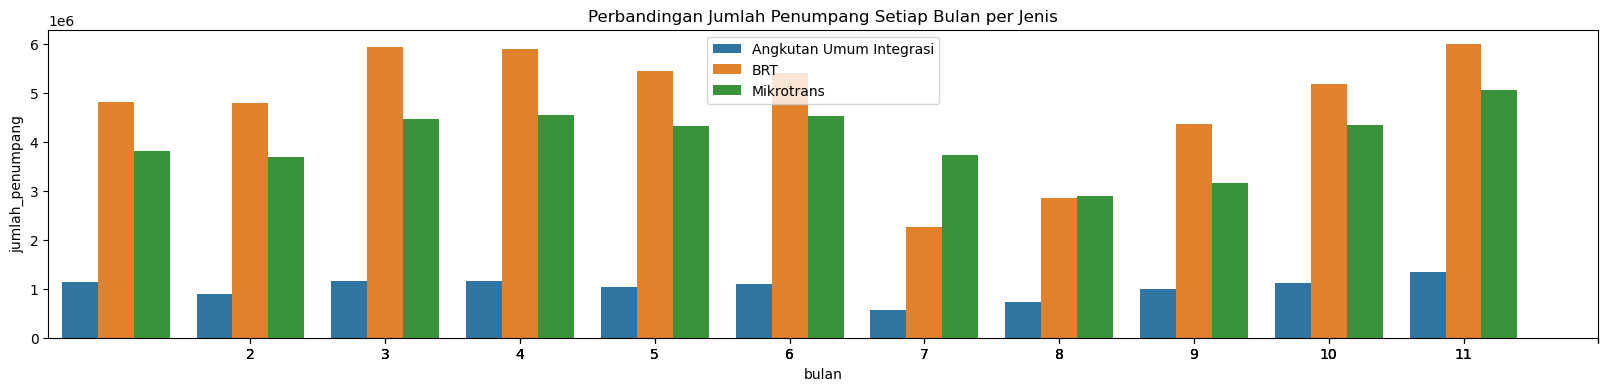

In [171]:
plt.figure(figsize=(20,4))

sns.barplot(
    data=df_jenis,
    x= 'bulan',           
    y= 'jumlah_penumpang',
    hue= 'jenis',
    ci=0         
)

plt.xticks(ticks=df_jenis['bulan'])
plt.title('Perbandingan Jumlah Penumpang Setiap Bulan per Jenis')
plt.legend()
plt.show()

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:

* Jenis mana yang memiliki paling banyak jumlah penumpang? 
    * jenis yang memiliki paling banyak jumlah penumpang secara keseluruhan adalah BRT, hal tersebut juga dapat disebabkan karena kapasitas dan trayek yang dilalui BRT merupakan yang paling padat dan sibuk.
* Pada setiap Jenis bagaimana jumlah penumpang pada setiap bulannya?
    * secara keseluruhan jumlah penumpang sangat fluktuatif, tetapi pada BRT terdapat penurunan yang cukup besar di bulan Juli, sementara pada Mikrotrans terdapat penurunan pada bulan Agustus.
* Dari Jenis mana jumlah penumpang paling banyak? Apakah secara proporsi jenis tersebut juga memiliki jumlah penumpang paling tinggi setiap bulannya?
    * BRT yang merupakan jenis dengan jumlah penumpang paling banyak memiliki penurunan pada bulan Juli dan Agustus yang menyebabkan BRT tidak menjadi jenis yang mempunyai proporsi paling banyak dalam jumlah penumpang pada bulan tersebut.

## Berdasarkan kode trayek: `jenis` dan `kode_trayek` 

berikutnya, mari kita lihat bagaimana pengaruh kode trayek dengan jumlah penumpang. Kita akan menganalisis kolom  `kode_trayek` berdasarkan `jenis` untuk menjawab beberapa pertanyaan.

* Kode trayek mana yang memiliki paling banyak jumlah penumpang berdasarkan jenis?
* Kode trayek mana yang memiliki paling sedikit jumlah penumpang berdasarkan jenis?

In [172]:
# membuat dataframe untuk setiap jenis
df_trayek_AUI = df[df['jenis']=='Angkutan Umum Integrasi'].groupby('kode_trayek')['jumlah_penumpang'].sum().reset_index()
df_trayek_BRT = df[df['jenis']=='BRT'].groupby('kode_trayek')['jumlah_penumpang'].sum().reset_index()
df_trayek_Mikro = df[df['jenis']=='Mikrotrans'].groupby('kode_trayek')['jumlah_penumpang'].sum().reset_index()


In [173]:
# mengurutkan jumlah penumpang pada setiap jenis dari yang terbesar
df_trayek_AUI = df_trayek_AUI.sort_values(by='jumlah_penumpang', ascending=False)
df_trayek_BRT = df_trayek_BRT.sort_values(by='jumlah_penumpang', ascending=False)
df_trayek_Mikro = df_trayek_Mikro.sort_values(by='jumlah_penumpang', ascending=False)

In [174]:
# mengambil 5 trayek dengan jumlah penumpang pada setiap jenisnya
top_5_AUI = df_trayek_AUI.nlargest(5, 'jumlah_penumpang')
top_5_BRT = df_trayek_BRT.nlargest(5, 'jumlah_penumpang')
top_5_Mikro = df_trayek_Mikro.nlargest(5, 'jumlah_penumpang')

In [175]:
# mengambil 5 trayek dengan jumlah penumpang pada setiap jenisnya
bottom_5_AUI = df_trayek_AUI.nsmallest(5, 'jumlah_penumpang')
bottom_5_BRT = df_trayek_BRT.nsmallest(5, 'jumlah_penumpang')
bottom_5_Mikro = df_trayek_Mikro.nsmallest(5, 'jumlah_penumpang')

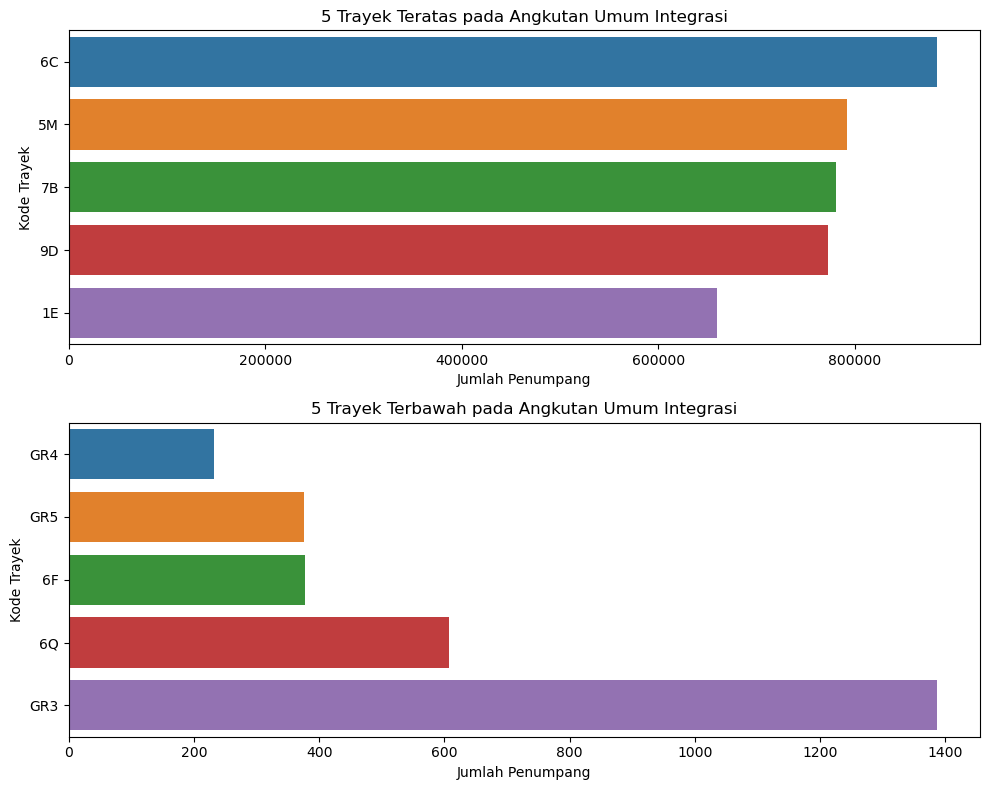

In [176]:
# Membuat objek figure dan axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Subplot pertama: Barplot 5 Trayek Teratas pada Angkutan Umum Integrasi
sns.barplot(x='jumlah_penumpang', y='kode_trayek', data=top_5_AUI, ax=axes[0])
axes[0].set_title('5 Trayek Teratas pada Angkutan Umum Integrasi')
axes[0].set_xlabel('Jumlah Penumpang')
axes[0].set_ylabel('Kode Trayek')

# Subplot kedua: Barplot 5 Trayek Terbawah pada Angkutan Umum Integrasi
sns.barplot(x='jumlah_penumpang', y='kode_trayek', data=bottom_5_AUI, ax=axes[1])
axes[1].set_title('5 Trayek Terbawah pada Angkutan Umum Integrasi')
axes[1].set_xlabel('Jumlah Penumpang')
axes[1].set_ylabel('Kode Trayek')

# Menampilkan plot
plt.tight_layout()
plt.show()

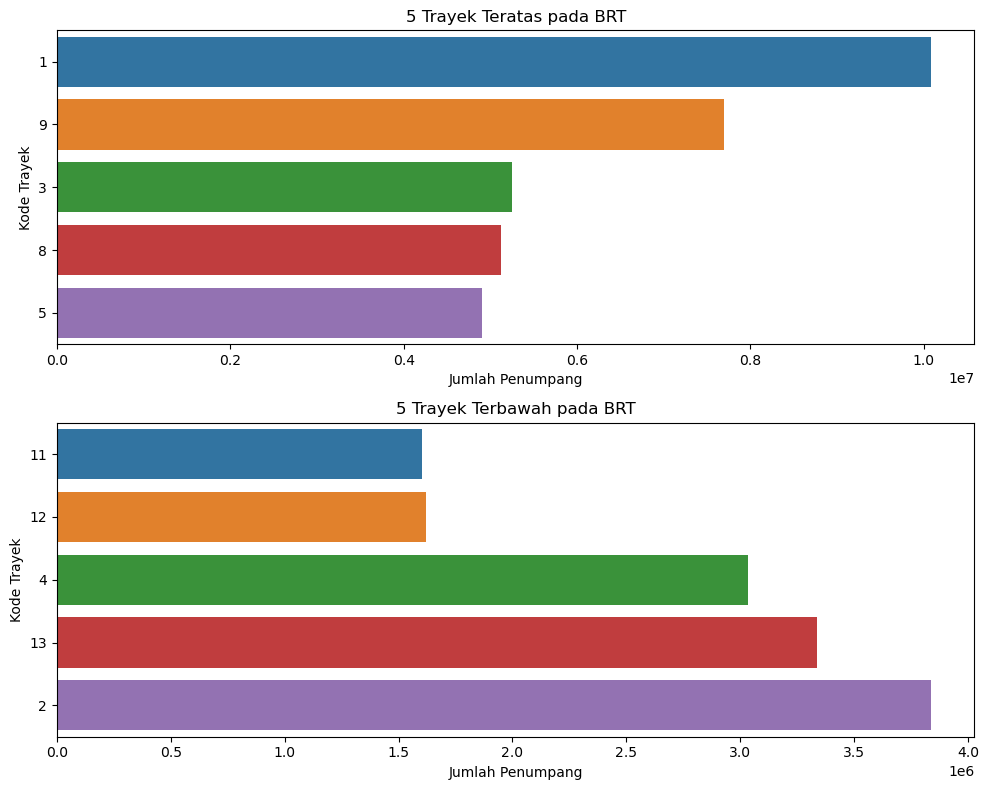

In [177]:
# Membuat objek figure dan axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Subplot pertama: Barplot 5 Trayek Teratas pada BRT
sns.barplot(x='jumlah_penumpang', y='kode_trayek', data=top_5_BRT, ax=axes[0])
axes[0].set_title('5 Trayek Teratas pada BRT')
axes[0].set_xlabel('Jumlah Penumpang')
axes[0].set_ylabel('Kode Trayek')

# Subplot kedua: Barplot 5 Trayek Terbawah pada BRT
sns.barplot(x='jumlah_penumpang', y='kode_trayek', data=bottom_5_BRT, ax=axes[1])
axes[1].set_title('5 Trayek Terbawah pada BRT')
axes[1].set_xlabel('Jumlah Penumpang')
axes[1].set_ylabel('Kode Trayek')

# Menampilkan plot
plt.tight_layout()
plt.show()

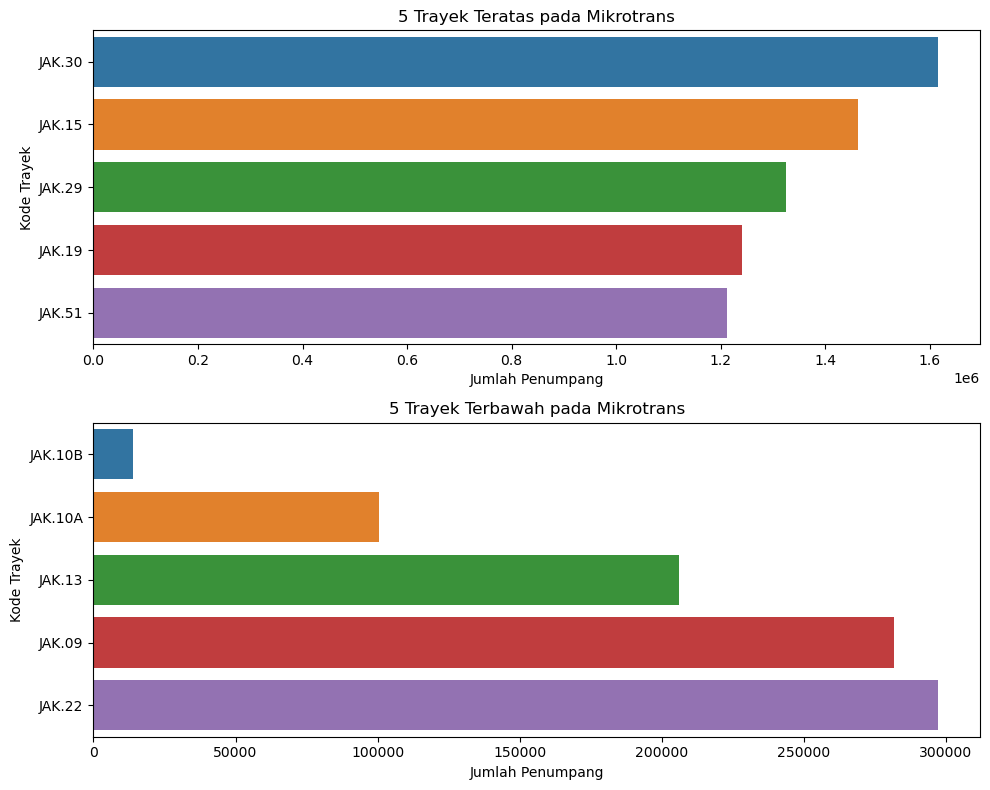

In [178]:
# Membuat objek figure dan axes
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Subplot pertama: Barplot 5 Trayek Teratas pada Mikrotrans
sns.barplot(x='jumlah_penumpang', y='kode_trayek', data=top_5_Mikro, ax=axes[0])
axes[0].set_title('5 Trayek Teratas pada Mikrotrans')
axes[0].set_xlabel('Jumlah Penumpang')
axes[0].set_ylabel('Kode Trayek')

# Subplot kedua: Barplot 5 Trayek Terbawah pada Mikrotrans
sns.barplot(x='jumlah_penumpang', y='kode_trayek', data=bottom_5_Mikro, ax=axes[1])
axes[1].set_title('5 Trayek Terbawah pada Mikrotrans')
axes[1].set_xlabel('Jumlah Penumpang')
axes[1].set_ylabel('Kode Trayek')

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari grafik-grafik di atas, kita bisa menjawab pertanyaan:

* Kode trayek mana yang memiliki paling banyak jumlah penumpang berdasarkan jenis? 
    * Angkutan Umum Integrasi : 'kode_trayek' 6C
    * BRT                     : 'kode_trayek' 1
    * Mikrotrans              : 'kode_trayek' JAK.30
* Kode trayek mana yang memiliki paling sedikit jumlah penumpang berdasarkan jenis?
    * Angkutan Umum Integrasi : 'kode_trayek' GR4
    * BRT                     : 'kode_trayek' 11
    * Mikrotrans              : 'kode_trayek' JAK.10B

If we look at the TransJakarta Official Website 
https://transjakarta.co.id/peta-rute/
<br>'kode_trayek' 6C      : Stasiun Tebet - Karet Via Patra Kuningan
<br>'kode_trayek' 1       : Blok M - Kota
<br>'kode_trayek' JAK.30  : Grogol - Meruya Via Roxy
<br>'kode_trayek' GR4     : Kota Intan - Museum Bahari
<br>'kode_trayek' 11      : Pulo Gebang - Matraman 1
<br>'kode_trayek' JAK.10B : Gondangdia - Cikini Via Kramat Raya

# Kesimpulan dan Rekomendasi 

**Kesimpulan**<br>
Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut tetang jumlah penumpang Tranjakarta:
1. jenis yang memiliki paling banyak jumlah penumpang secara keseluruhan adalah BRT, hal tersebut juga dapat disebabkan karena kapasitas dan trayek yang dilalui BRT merupakan yang paling padat dan sibuk.
2. secara keseluruhan jumlah penumpang sangat fluktuatif, tetapi pada BRT terdapat penurunan yang cukup besar di bulan Juli, sementara pada Mikrotrans terdapat penurunan pada bulan Agustus.
3. BRT yang merupakan jenis dengan jumlah penumpang paling banyak memiliki penurunan pada bulan Juli dan Agustus yang menyebabkan BRT tidak menjadi jenis yang mempunyai proporsi paling banyak dalam jumlah penumpang pada bulan tersebut.
4. Kode trayek yang memiliki paling banyak jumlah penumpang berdasarkan jenis: 
    * Angkutan Umum Integrasi : 'kode_trayek' 6C
    * BRT                     : 'kode_trayek' 1
    * Mikrotrans              : 'kode_trayek' JAK.30
5. Kode trayek yang memiliki paling sedikit jumlah penumpang berdasarkan jenis:
    * Angkutan Umum Integrasi : 'kode_trayek' GR4
    * BRT                     : 'kode_trayek' 11
    * Mikrotrans              : 'kode_trayek' JAK.10B

**Rekomendasi**<br>
Rekomendasi yang dapat diberikan dari hasil analisis pada data penumpang Transjakarta:
1. Mencoba untuk memaksimalkan Angkutan Umum Integrasi dengan menambah jumlah Armada.
2. Mengurangi Armada BRT yang beroperasi Pada bulan Juli dan Agustus dan Memperbanyak Armada Mikrotrans khususnya pada trayek dengan frekuensi tinggi.
3. Mengurangi Armada pada trayek yang memiliki frekuensi jumlah penumpang yang sedikit, perlu untuk dihilangkan jika trayek yang dilalui masih dapat dilalui oleh Armada dengan trayek lain.